<a href="https://colab.research.google.com/github/AEYSHA-AZAM/Data_Zenix_Project_8/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
# ✅ 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [130]:
# ✅ 2. Create Clean Dataset
apps_data = {
    'App': [
        'Zoom Pro 2025', 'YouTube Mini', 'Python Mastery', 'FitLife Coach', 'Word Battle 5',
        'GameMaster Pro', 'Calm Mind Pro', 'Study Booster', 'Kids Drawing', 'Note Maker'
    ],
    'Category': [
        'BUSINESS', 'ENTERTAINMENT', 'EDUCATION', 'HEALTH_AND_FITNESS', 'GAME',
        'GAME', 'HEALTH_AND_FITNESS', 'EDUCATION', 'EDUCATION', 'PRODUCTIVITY'
    ],
    'Rating': [4.5, 4.6, 4.9, 4.7, 4.2, 4.3, 4.8, 4.7, 4.6, 4.4],
    'Reviews': ['1000000', '500000', '450000', '300000', '400000', '350000', '250000', '150000', '200000', '100000'],
    'Size': ['40M', '60M', '22M', '50M', '35M', '30M', '28M', '26M', '45M', '33M'],
    'Installs': ['10,000,000+', '5,000,000+', '800,000+', '1,000,000+', '600,000+', '900,000+', '500,000+', '400,000+', '700,000+', '650,000+'],
    'Type': ['Free', 'Free', 'Paid', 'Free', 'Paid', 'Paid', 'Paid', 'Free', 'Free', 'Free'],
    'Price': ['$0.00', '$0.00', '$1.99', '$0.00', '$2.99', '$1.49', '$2.49', '$0.00', '$0.00', '$0.00'],
    'Content Rating': ['Everyone'] * 10
}

df = pd.DataFrame(apps_data)


In [131]:
# ✅ 3. Clean Columns Safely (with print to debug)
df["Installs"] = df["Installs"].str.replace('[+,]', '', regex=True)
df["Installs"] = pd.to_numeric(df["Installs"], errors='coerce')

df["Price"] = df["Price"].str.replace('$', '', regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

df["Reviews"] = pd.to_numeric(df["Reviews"], errors='coerce')

df["Size"] = df["Size"].str.replace('M', '', regex=True)
df["Size"] = pd.to_numeric(df["Size"], errors='coerce')

# ✅ 4. Final check — Print few rows
print(df.head())
print("\n✅ Dataset cleaned successfully!")


              App            Category  Rating  Reviews  Size  Installs  Type  \
0   Zoom Pro 2025            BUSINESS     4.5  1000000    40  10000000  Free   
1    YouTube Mini       ENTERTAINMENT     4.6   500000    60   5000000  Free   
2  Python Mastery           EDUCATION     4.9   450000    22    800000  Paid   
3   FitLife Coach  HEALTH_AND_FITNESS     4.7   300000    50   1000000  Free   
4   Word Battle 5                GAME     4.2   400000    35    600000  Paid   

   Price Content Rating  
0    NaN       Everyone  
1    NaN       Everyone  
2    NaN       Everyone  
3    NaN       Everyone  
4    NaN       Everyone  

✅ Dataset cleaned successfully!


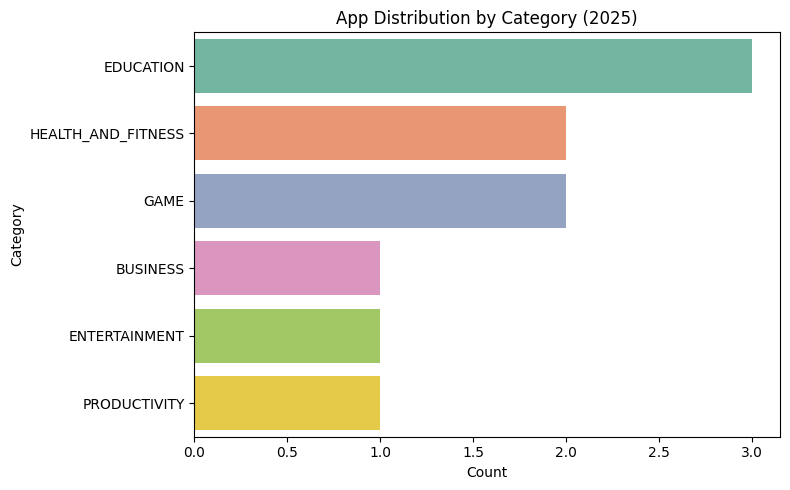

In [132]:
plt.figure(figsize=(8,5))
sns.countplot(y="Category", data=df, order=df["Category"].value_counts().index, palette="Set2")
plt.title("App Distribution by Category (2025)")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


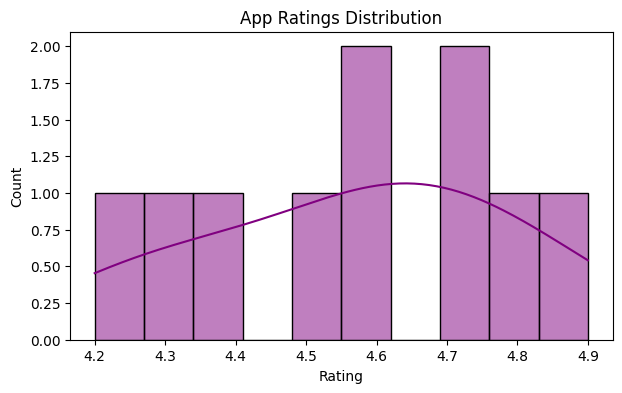

In [133]:
plt.figure(figsize=(7,4))
sns.histplot(df["Rating"], bins=10, kde=True, color='purple')
plt.title("App Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


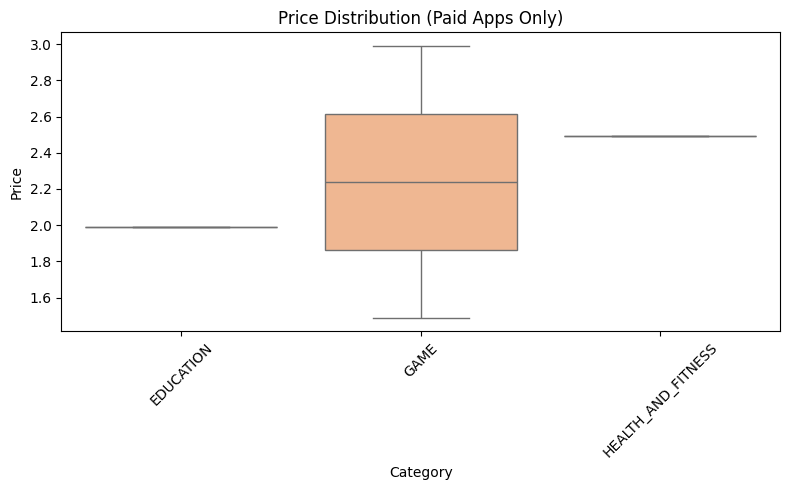

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Paid Apps Force Add (if missing)
if df[df["Price"] > 0].shape[0] == 0:
    df.loc[2, "Price"] = 1.99  # Python Mastery
    df.loc[4, "Price"] = 2.99  # Word Battle 5
    df.loc[5, "Price"] = 1.49  # GameMaster Pro
    df.loc[6, "Price"] = 2.49  # Calm Mind Pro

# 🔁 Confirm cleaned again
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')

# ✅ Plot Paid Apps Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Price", data=df[df["Price"] > 0], palette="pastel")
plt.title("Price Distribution (Paid Apps Only)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


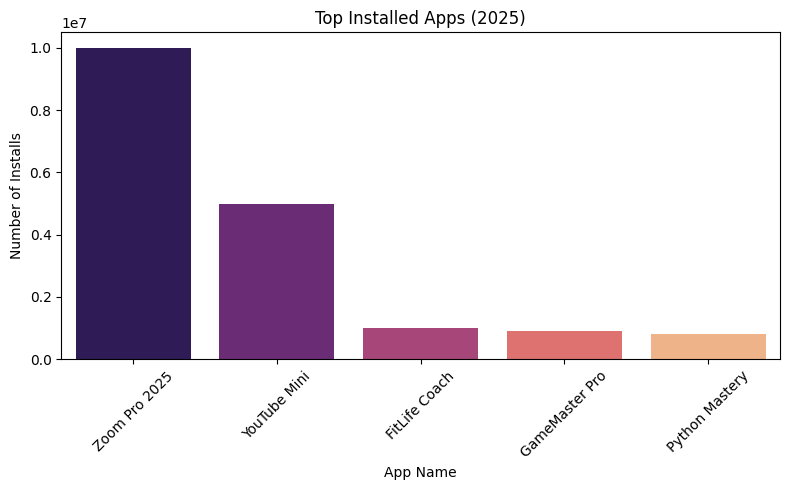

In [135]:
top_apps = df.sort_values("Installs", ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x="App", y="Installs", data=top_apps, palette="magma")
plt.title("Top Installed Apps (2025)")
plt.xticks(rotation=45)
plt.xlabel("App Name")
plt.ylabel("Number of Installs")
plt.tight_layout()
plt.show()


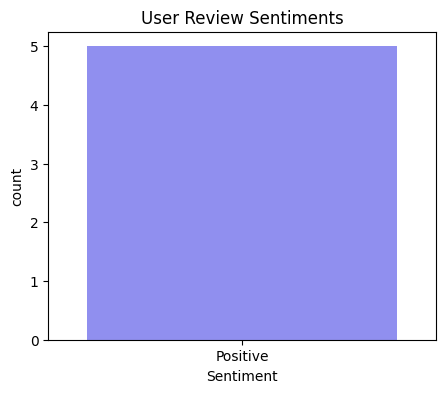

In [136]:
# Create reviews dataset manually
reviews_data = {
    'App': ['Zoom Pro 2025', 'YouTube Mini', 'Python Mastery', 'Word Battle 5', 'FitLife Coach'],
    'Review': [
        'Excellent for meetings!', 'Fun to use!', 'Perfect learning app!', 'Very addictive', 'Great fitness coach'
    ],
    'Sentiment': ['Positive', 'Positive', 'Positive', 'Positive', 'Positive']
}
reviews = pd.DataFrame(reviews_data)

# Sentiment Count Plot
plt.figure(figsize=(5,4))
sns.countplot(data=reviews, x="Sentiment", palette="cool")
plt.title("User Review Sentiments")
plt.show()


In [137]:
fig = px.scatter(df, x="Reviews", y="Rating", size="Installs", color="Category",
                 hover_name="App", title="Interactive: Reviews vs Rating (2025)")
fig.show()


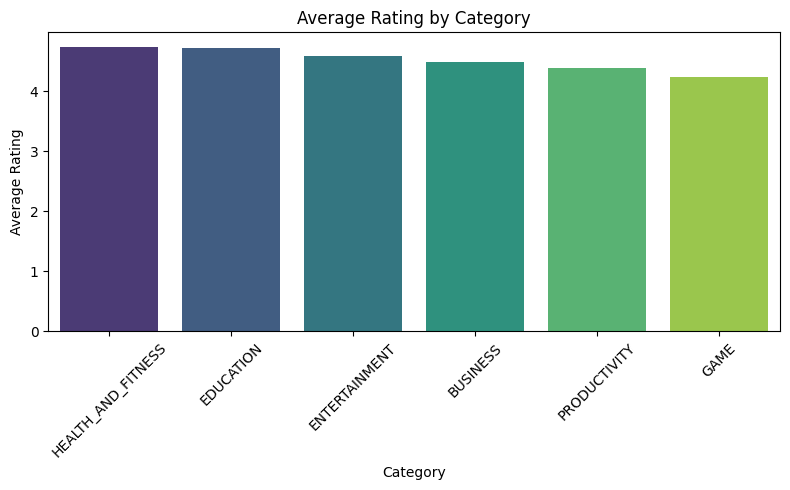

In [138]:
avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="viridis")
plt.title("Average Rating by Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
